In [78]:
import argparse
import os
import os.path as osp

import numpy as np
import matplotlib.pyplot as plt
import imageio


def min_max_norm(x: np.ndarray) -> np.ndarray:
    x_min, x_max = float(np.nanmin(x)), float(np.nanmax(x))
    if x_max - x_min < 1e-12:
        return np.zeros_like(x)
    return (x - x_min) / (x_max - x_min)


def save_grid(frames: np.ndarray, ncols: int, out_path: str, cmap: str = 'GnBu'):
    # frames: [T, H, W] or [T, H, W, 1]
    T = frames.shape[0]
    ncols = min(ncols, T)
    fig, axes = plt.subplots(1, ncols, figsize=(3.0 * ncols, 3.0))
    if ncols == 1:
        axes = [axes]
    for i in range(ncols):
        f = frames[i]
        if f.ndim == 3 and f.shape[-1] == 1:
            f = f[..., 0]
        axes[i].imshow(f, cmap=cmap)
        axes[i].axis('off')
    fig.tight_layout()
    os.makedirs(osp.dirname(out_path), exist_ok=True)
    fig.savefig(out_path, dpi=200, bbox_inches='tight', pad_inches=0)
    plt.close(fig)


def save_gif(frames: np.ndarray, out_path: str, cmap: str = 'GnBu'):
    images = []
    for i in range(frames.shape[0]):
        f = frames[i]
        if f.ndim == 3 and f.shape[-1] == 1:
            f = f[..., 0]
        f = (min_max_norm(f) * 255.0).astype(np.uint8)
        images.append(f)
    if not out_path.endswith('.gif'):
        out_path = out_path + '.gif'
    os.makedirs(osp.dirname(out_path), exist_ok=True)
    imageio.mimsave(out_path, images, duration=0.3)


p = argparse.ArgumentParser(description='Simple visualization from saved arrays')
p.add_argument('--base', type=str, required=True, help='Experiment base dir under work_dirs')
p.add_argument('--index', type=int, default=0, help='Sample index')
args = p.parse_args(["--base", "/hub_data1/seunghun/OpenSTL/work_dirs/weather_simvp_inr_all"])

saved_dir = osp.join(args.base, 'saved')
inputs = np.load(osp.join(saved_dir, 'test_inputs.npy'))
trues = np.load(osp.join(saved_dir, 'test_trues.npy'))
preds = np.load(osp.join(saved_dir, 'test_preds.npy'))

# Expect [B, T, C, H, W]
b = args.index
x = inputs[b]
y = trues[b]
yhat = preds[b]

# Collapse channel dim if single-channel
def collapse(a):
    if a.ndim == 4 and a.shape[1] == 1:
        a = a[:, 0]
    elif a.ndim == 4:
        # average channels for quick viewing
        a = a.mean(axis=1)
    return a

x = collapse(x)
y = collapse(y)
yhat = collapse(yhat)

# Normalize each set independently for visibility
x_n = min_max_norm(x)
y_n = min_max_norm(y)
yhat_n = min_max_norm(yhat)

vis_dir = osp.join(args.base, 'vis_simple')
os.makedirs(vis_dir, exist_ok=True)

# save_grid(x_n, ncols=x_n.shape[0], out_path=osp.join(vis_dir, 'input_grid.png'))
# save_grid(y_n, ncols=y_n.shape[0], out_path=osp.join(vis_dir, 'true_grid.png'))
# save_grid(yhat_n, ncols=yhat_n.shape[0], out_path=osp.join(vis_dir, 'pred_grid.png'))

# save_gif(x_n, osp.join(vis_dir, 'input'))
# save_gif(y_n, osp.join(vis_dir, 'true'))
# save_gif(yhat_n, osp.join(vis_dir, 'pred'))

# print('Saved:', vis_dir, sorted(os.listdir(vis_dir)))
print(np.power((np.power((trues - preds)*std*cos_lats[:,None], 2))[:,:,0].mean((-1,-2))/cos_lats.mean(), 1/2).mean(0)[[5,11]])


[1.1027684  1.23545041]


In [44]:
y.shape, yhat.shape

((12, 128, 256), (12, 128, 256))

In [3]:
lats = np.array([-89.296875, -87.890625, -86.484375, -85.078125, -83.671875, -82.265625,
       -80.859375, -79.453125, -78.046875, -76.640625, -75.234375, -73.828125,
       -72.421875, -71.015625, -69.609375, -68.203125, -66.796875, -65.390625,
       -63.984375, -62.578125, -61.171875, -59.765625, -58.359375, -56.953125,
       -55.546875, -54.140625, -52.734375, -51.328125, -49.921875, -48.515625,
       -47.109375, -45.703125, -44.296875, -42.890625, -41.484375, -40.078125,
       -38.671875, -37.265625, -35.859375, -34.453125, -33.046875, -31.640625,
       -30.234375, -28.828125, -27.421875, -26.015625, -24.609375, -23.203125,
       -21.796875, -20.390625, -18.984375, -17.578125, -16.171875, -14.765625,
       -13.359375, -11.953125, -10.546875,  -9.140625,  -7.734375,  -6.328125,
        -4.921875,  -3.515625,  -2.109375,  -0.703125,   0.703125,   2.109375,
         3.515625,   4.921875,   6.328125,   7.734375,   9.140625,  10.546875,
        11.953125,  13.359375,  14.765625,  16.171875,  17.578125,  18.984375,
        20.390625,  21.796875,  23.203125,  24.609375,  26.015625,  27.421875,
        28.828125,  30.234375,  31.640625,  33.046875,  34.453125,  35.859375,
        37.265625,  38.671875,  40.078125,  41.484375,  42.890625,  44.296875,
        45.703125,  47.109375,  48.515625,  49.921875,  51.328125,  52.734375,
        54.140625,  55.546875,  56.953125,  58.359375,  59.765625,  61.171875,
        62.578125,  63.984375,  65.390625,  66.796875,  68.203125,  69.609375,
        71.015625,  72.421875,  73.828125,  75.234375,  76.640625,  78.046875,
        79.453125,  80.859375,  82.265625,  83.671875,  85.078125,  86.484375,
        87.890625,  89.296875])
cos_lats = np.cos(lats * np.pi / 180)

In [4]:
mean, std = 278.75897, 21.337255

In [5]:
trues.shape, preds.shape

((4, 12, 1, 721, 1440), (4, 12, 1, 720, 1440))

In [6]:
((trues - preds)**2).mean()

ValueError: operands could not be broadcast together with shapes (4,12,1,721,1440) (4,12,1,720,1440) 

In [64]:
np.power((trues - preds)[:,:,0].mean((-1,-2)),1/2).mean(0)

/tmp/ipykernel_3162719/630949390.py:1: RuntimeWarning: invalid value encountered in power
  np.power((trues - preds)[:,:,0].mean((-1,-2)),1/2).mean(0)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

In [59]:
trues.shape, preds.shape

((4, 12, 1, 128, 256), (4, 12, 1, 128, 256))

In [ ]:
np.power((np.power((trues - preds)*std*cos_lats[:,None], 2))[:,:,0].mean((-1,-2))/cos_lats.mean(), 1/2).mean(0)[[5,11]]

array([13.9766592 , 14.08665408])

In [8]:
from matplotlib import rc
rc("animation", embed_limit=50)  # 50MB로 제한 올리기

In [50]:
pred_frames.shape

(48, 0, 100)

In [20]:
90/128*721

506.953125

In [ ]:
256
75 100
1440
422 562

128 
40 90
721
225 507

In [ ]:
import torch
import torch.nn.functional as F

# yhat_interp: yhat을 (721, 1440)로 보간
# yhat: (T, H, W)
y_tensor = torch.from_numpy(y).float().unsqueeze(0).unsqueeze(0)  # (1,1,T,H,W)
# y_interp = F.interpolate(
#     y_tensor, size=(y.shape[0], 721, 1440), mode='trilinear', align_corners=False
# )
y_interp = F.interpolate(y_tensor, size=(721, 1440), mode="bicubic", align_corners=False)
yhat_interp = y_interp.squeeze(0).squeeze(0).numpy()  # (T, 721, 1440)


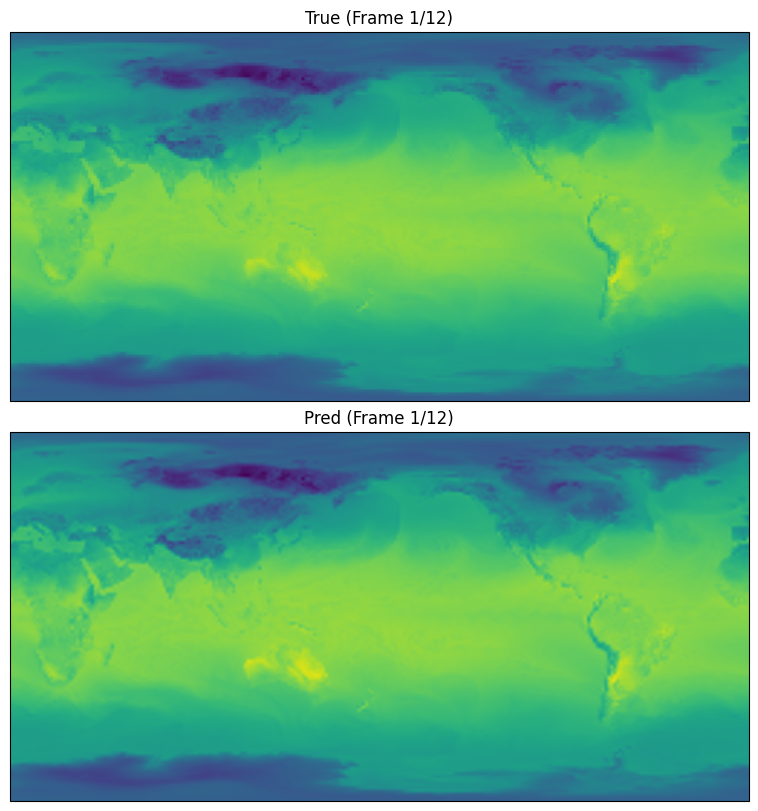

In [57]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

from matplotlib import rc
import cartopy.crs as ccrs

rc("animation", html="jshtml")

# --------------------
# 준비: collapse까지 끝난 원본값 그대로 (정규화/스케일링 금지)
# y.shape == [T, H, W], yhat.shape == [T, H, W]
true_frames = y[:12]#, 75:100, 40:90]
pred_frames = yhat_interp[:12]#, 422:562, 225:507]#, 150:200, 80:180]
T, H, W = pred_frames.shape

# 형님 데이터의 위도 범위 넣어줘 (예: 한반도면 30~48 정도, 전지구면 -90~90)
lat_min, lat_max = -90.0, 90.0

# 경도는 0~360이라고 했으니 그대로 쓴다
lon_min, lon_max = 0.0, 360.0

# 축 투영:
# - 데이터 transform은 0 기준 PlateCarree (경도 0~360 그대로)
# - 축은 180 중심으로 두면 전지구가 자연스럽게 보임(원하면 central_longitude=0으로 바꿔도 됨)
data_crs = ccrs.PlateCarree(central_longitude=0)
axes_crs = ccrs.PlateCarree(central_longitude=180)

fig, axes = plt.subplots(
    2, 1, figsize=(8, 8), subplot_kw={'projection': axes_crs},
    constrained_layout=True
)

# 축 꾸미기: 글자/틱/국경선 X, 해안선만 110m
for ax, title in zip(axes, ["True", "Pred"]):
    ax.set_title(title)
    # ax.coastlines(resolution="110m")
    ax.set_xticks([]); ax.set_yticks([])
    # extent는 "축 좌표계" 기준으로 넣지만, transform을 통해 데이터 좌표(0~360, lat_min~lat_max)와 매칭됨
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=data_crs)

# 공정 비교 위해 동일 vmin/vmax (데이터 값은 그대로, 스케일만 통일)
vmin = min(float(np.nanmin(true_frames)), float(np.nanmin(pred_frames)))
vmax = max(float(np.nanmax(true_frames)), float(np.nanmax(pred_frames)))

# 첫 프레임 그리기 (imshow 대신 지도 위 오버레이지만, 그리드는 규칙격자라 imshow가 가장 빠름)
im_true = axes[0].imshow(
    true_frames[0], origin="lower", cmap="viridis",
    vmin=vmin, vmax=vmax,
    extent=[lon_min, lon_max, lat_min, lat_max],
    transform=data_crs,  # 데이터는 0~360 경도
    animated=True
)
im_pred = axes[1].imshow(
    pred_frames[0], origin="lower", cmap="viridis",
    vmin=vmin, vmax=vmax,
    extent=[lon_min, lon_max, lat_min, lat_max],
    transform=data_crs,
    animated=True
)

def update(i):
    im_true.set_data(true_frames[i])
    im_pred.set_data(pred_frames[i])
    axes[0].set_title(f"True (Frame {i+1}/{T})")
    axes[1].set_title(f"Pred (Frame {i+1}/{T})")
    return (im_true, im_pred)

ani = FuncAnimation(fig, update, frames=T, interval=300, blit=False)

ani.save("animation.gif", writer=PillowWriter(fps=10))
# 주피터에서 이 객체가 마지막에 출력되면 재생/슬라이더 컨트롤 자동으로 뜸
ani


(60, 128, 256)

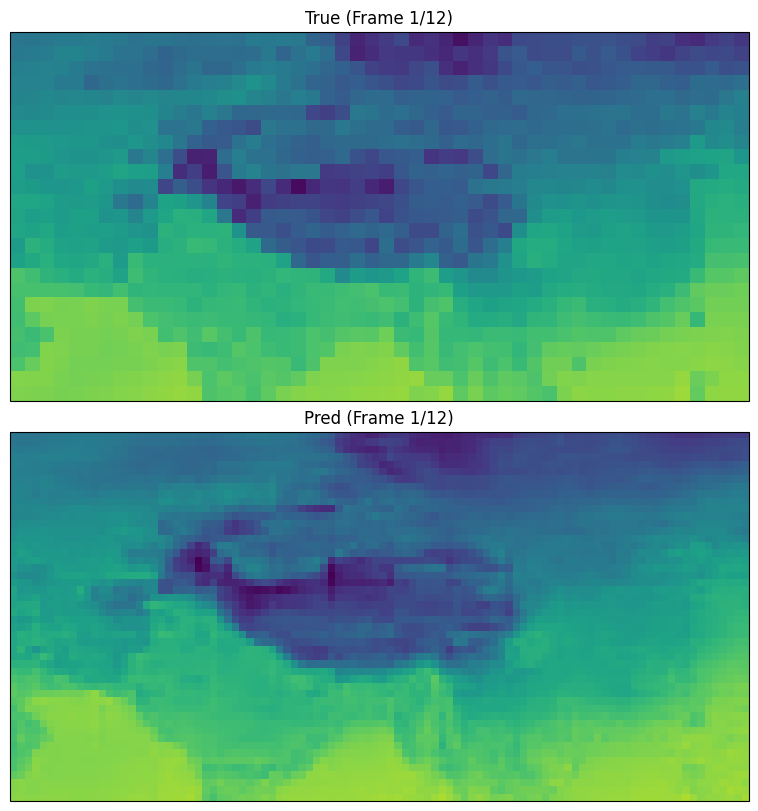

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

from matplotlib import rc
import cartopy.crs as ccrs

rc("animation", html="jshtml")

# --------------------
# 준비: collapse까지 끝난 원본값 그대로 (정규화/스케일링 금지)
# y.shape == [T, H, W], yhat.shape == [T, H, W]
true_frames = y[:12, 75:100, 40:90]
pred_frames = yhat[:12, 150:200, 80:180]

T, H, W = true_frames.shape


# 축 투영:
# - 데이터 transform은 0 기준 PlateCarree (경도 0~360 그대로)
# - 축은 180 중심으로 두면 전지구가 자연스럽게 보임(원하면 central_longitude=0으로 바꿔도 됨)
# data_crs = ccrs.PlateCarree(central_longitude=0)
# axes_crs = ccrs.PlateCarree(central_longitude=180)

fig, axes = plt.subplots(
    2, 1, figsize=(8, 8), subplot_kw={'projection': axes_crs},
    constrained_layout=True
)

# 축 꾸미기: 글자/틱/국경선 X, 해안선만 110m
for ax, title in zip(axes, ["True", "Pred"]):
    ax.set_title(title)
    # ax.coastlines(resolution="110m")
    ax.set_xticks([]); ax.set_yticks([])
    # extent는 "축 좌표계" 기준으로 넣지만, transform을 통해 데이터 좌표(0~360, lat_min~lat_max)와 매칭됨
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=data_crs)

# 공정 비교 위해 동일 vmin/vmax (데이터 값은 그대로, 스케일만 통일)
vmin = min(float(np.nanmin(true_frames)), float(np.nanmin(pred_frames)))
vmax = max(float(np.nanmax(true_frames)), float(np.nanmax(pred_frames)))

# 첫 프레임 그리기 (imshow 대신 지도 위 오버레이지만, 그리드는 규칙격자라 imshow가 가장 빠름)
im_true = axes[0].imshow(
    true_frames[0], origin="lower", cmap="viridis",
    vmin=vmin, vmax=vmax,
    transform=data_crs,  # 데이터는 0~360 경도
    animated=True
)
im_pred = axes[1].imshow(
    pred_frames[0], origin="lower", cmap="viridis",
    vmin=vmin, vmax=vmax,
    transform=data_crs,
    animated=True
)

def update(i):
    im_true.set_data(true_frames[i])
    im_pred.set_data(pred_frames[i])
    axes[0].set_title(f"True (Frame {i+1}/{T})")
    axes[1].set_title(f"Pred (Frame {i+1}/{T})")
    return (im_true, im_pred)

ani = FuncAnimation(fig, update, frames=T, interval=300, blit=False)

ani.save("animation.gif", writer=PillowWriter(fps=10))
# 주피터에서 이 객체가 마지막에 출력되면 재생/슬라이더 컨트롤 자동으로 뜸
ani


In [47]:
import xarray as xr

data_path = "/hub_data3/seunghun/2m_temperature/2m_temperature_2011_1.40625deg.nc"
ds = xr.open_dataset(data_path)

In [48]:
data = ds.values

In [8]:
ani.save("animation.mp4", writer="ffmpeg")


In [10]:
ani.save(
    "animation.gif",
    writer=PillowWriter(fps=10),
    savefig_kwargs={"facecolor": "white", "edgecolor": "white", "transparent": False}
)